<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become familiar with the dataset

In [6]:
#Print summary of the dataframe contents
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [7]:
#Print information on dataframe columns and format
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [8]:
#Produce summary statistics of the data
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Task 2: Generate Descriptive Statistics and Visualizations
For all visualizations, please include a title in each graph and appropriate labels
Generate the following and explain your findings:
* For the "Median value of owner-occupied homes" provide a boxplot
* Provide a  bar plot for the Charles river variable
* Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
* Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
* Create a histogram for the pupil to teacher ratio variable

* ### For the "Median value of owner occupied homes", provide a *boxplot*

Text(0, 0.5, 'Median Value')

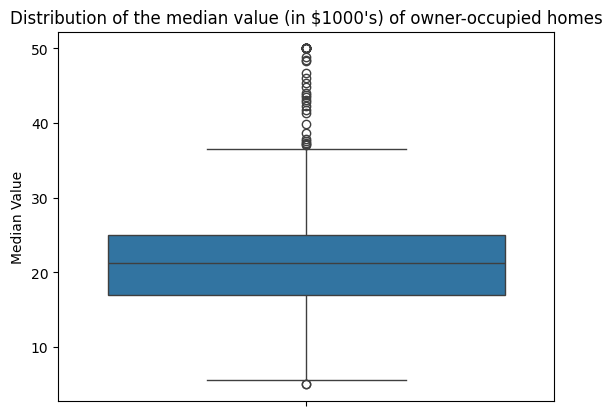

In [9]:
#We use the imported seaborn library to plot and display the data
myplot=sns.boxplot(y=boston_df["MEDV"])
myplot.set_title("Distribution of the median value (in $1000's) of owner-occupied homes")
myplot.set_ylabel("Median Value")

In [41]:
boston_df["MEDV"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

#### -> The median of the median value of owner-occupied homes is 21,200 USD with a standard deviation of 9,197 USD

* ### Provide a *bar plot* for the Charles river variable

Text(0.5, 0, 'Tract bounds Charles River')

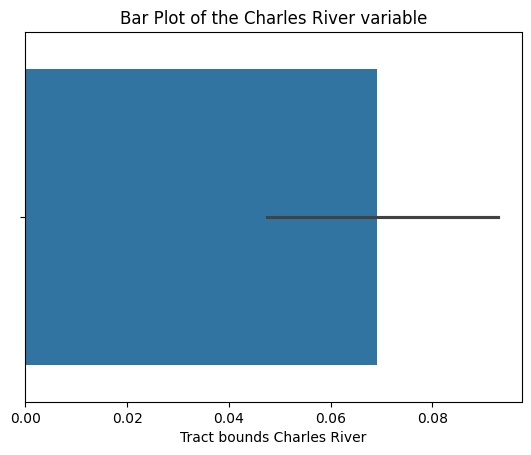

In [10]:
myplot=sns.barplot(x=boston_df.CHAS)
myplot.set_title("Bar Plot of the Charles River variable")
myplot.set_xlabel("Tract bounds Charles River")

* ### Provide a *boxplot* for the MEDV variable vs the AGE variable.
  Discretize the age variable into three groups of:
  * 35 years and younger
  * between 35 and 70 years
  * 70 years and older

In [80]:
#To discretize the age variable, we create a calculated column 'Age_Range'

boston_df.loc[(boston_df["AGE"] <= 35), "Age_Range"] = "Younger 35"
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"] < 70), "Age_Range"] = "Age 35 to 70"
boston_df.loc[(boston_df["AGE"] >= 70), "Age_Range"] = "Older 70"

In [81]:
print(boston_df["Age_Range"].describe())

count          506
unique           3
top       Older 70
freq           287
Name: Age_Range, dtype: object


Text(0, 0.5, 'Median Value of Owner-Occupied Homes')

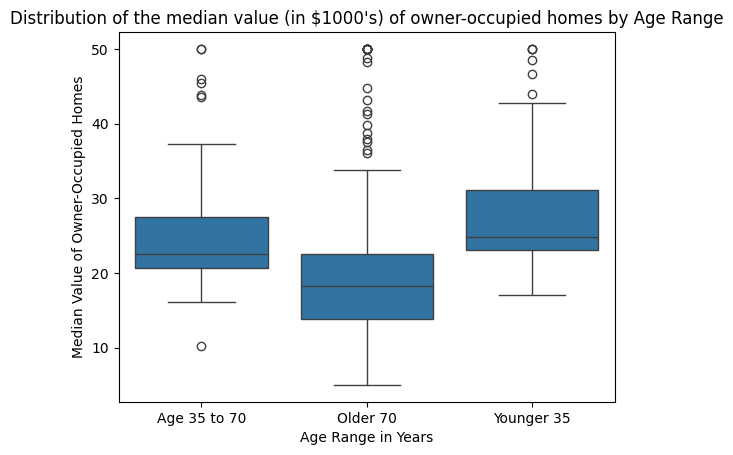

In [82]:
myplot=sns.boxplot(x=boston_df["Age_Range"],y=boston_df["MEDV"])
myplot.set_title("Distribution of the median value (in $1000's) of owner-occupied homes by Age Range")
myplot.set_xlabel("Age Range in Years")
myplot.set_ylabel("Median Value of Owner-Occupied Homes")

* Median House values are lowest for the 70 years and older age range. It is highest for age range 35 years and younger, suggesting a negative correlation between median value and age. Lets check:

* ### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
  What can you say about the relationship?

Text(0, 0.5, 'Proportion of Non-Retail business acres (%)')

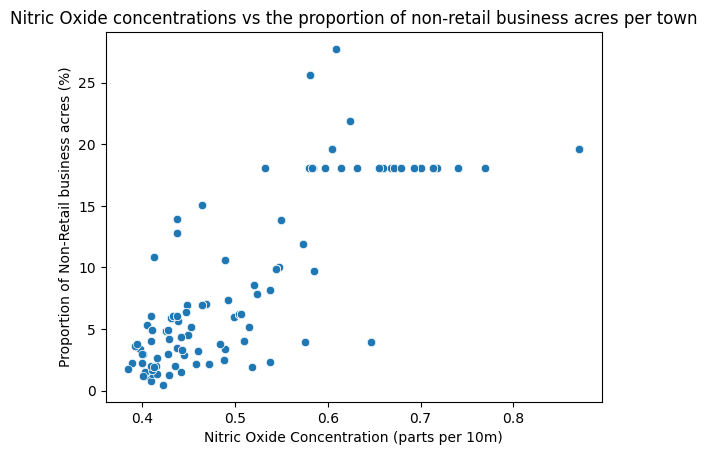

In [63]:
myplot=sns.scatterplot(x=boston_df.NOX,y=boston_df.INDUS)
myplot.set_title("Nitric Oxide concentrations vs the proportion of non-retail business acres per town")
myplot.set_xlabel("Nitric Oxide Concentration (parts per 10m)")
myplot.set_ylabel("Proportion of Non-Retail business acres (%)")

The plot suggests a postive correlation between Nitric Oxide concentrations and the proportion of non-retail business acres per town.

* ### Create a histogram for the pupil to teacher ratio variable

Text(0.5, 0, 'Parent Teacher Ratio')

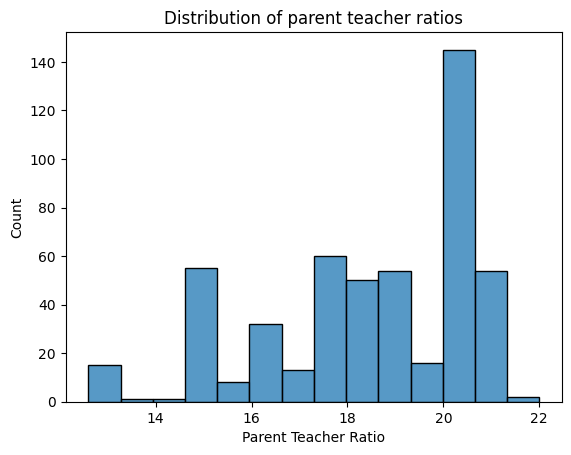

In [33]:
myplot=sns.histplot(x=boston_df.PTRATIO)
myplot.set_title("Distribution of parent teacher ratios")
myplot.set_xlabel("Parent Teacher Ratio")

# Task 3: Use the appropriate tests to answer the questions provided.
For each of the following questions;
* Is there a significant difference in median value of houses bounded by the Charles river or not? (**T-test** for independent samples)
* Is there a difference in Median values of houses (**MEDV**) for each proportion of owner occupied units built prior to 1940 (**AGE**)? (**ANOVA**)
* Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (**Pearson Correlation**)
* What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (**Regression analysis**)

Be sure to:
1. State your hypothesis
2. Use alpha = 0.05
3. Perform the test Statistics.
4. State the conclusion from the test

* ### Is there a significant difference in median value of houses bounded by the Charles river or not? (**T-test** for independent samples)


* ⍺ = 0.05

Hypothesis:
* H_0: μ1 = μ2 => There is **no difference** in median value of houses between those bounded by the Charles river or not
* H_1: μ1 ≠ μ2 => There **is a difference** in median value of houses between those bounded by the Charles river or not

In [83]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Conclusion**: Since the p-value on the t-test is less than alpha value of 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value based on whether it is bound by the Charles river or not

* ### Is there a difference in median value of houses for each proportion of owner occupied units built prior to 1940 based on Age Range?


* ⍺ = 0.05

Hypothesis:
* H_0: μ1 = μ2 = μ3 => There is **no difference** in median value of houses for each proportion of owner occupied units built prior to 1940
* H_1: at least one of the means differs from the others => There **is a difference** in median value of houses for each proportion of owner occupied units built prior to 1940

First create dummy variable to group the age ranges:

In [59]:
#To discretize the age variable, we create a calculated column 'Age_Range', set it based on the AGE column

boston_df.loc[(boston_df["AGE"] <= 35), "Age_Range"] = "Younger 35"
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"] < 70), "Age_Range"] = "Age 35 to 70"
boston_df.loc[(boston_df["AGE"] >= 70), "Age_Range"] = "Older 70"

Lets set the three samples a variable each:

In [60]:
Age_Younger_35 = boston_df[boston_df['Age_Range'] == 'Younger 35']['MEDV']
Age_35_70 = boston_df[boston_df['Age_Range'] == 'Age 35 to 70']['MEDV']
Age_Older_70 = boston_df[boston_df['Age_Range'] == 'Older 70']['MEDV']

In [84]:
#Run the ANOVA test
f_statistic, p_value = scipy.stats.f_oneway(Age_Younger_35,Age_35_70,Age_Older_70)
print("f_statistic: {0}, p-value {1}".format(f_statistic, p_value))

f_statistic: 36.40764999196599, p-value 1.7105011022702984e-15


**Conclusion**: Since the p-value on the ANOVA is less than alpha value of 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value based on age range

* ### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

* ⍺ = 0.05

Hypothesis:
* H_0: μ1 = μ2 => Nitric oxide concentrations **are not correlated** to the proportion of non-retail business acres per town
* H_1: μ1 ≠ μ2 => Nitric oxide concentrations **are correlated** to the proportion of non-retail business acres per town

Lets create a scatterplot to visualize the correlation:

Text(0, 0.5, 'Proportion of Non-Retail business acres (%)')

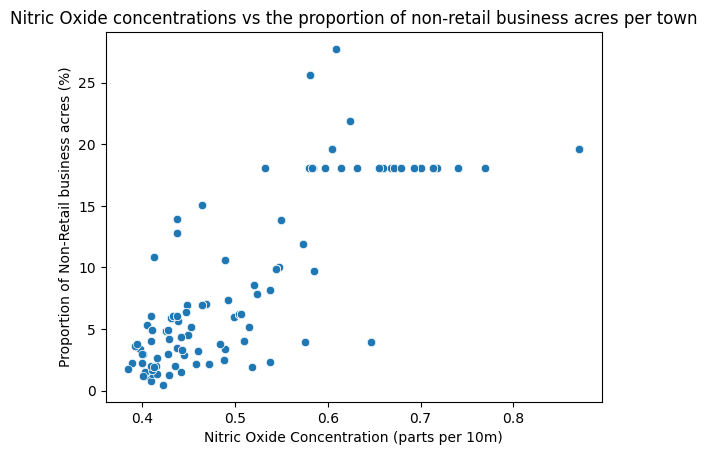

In [85]:
myplot=sns.scatterplot(x=boston_df.NOX,y=boston_df.INDUS)
myplot.set_title("Nitric Oxide concentrations vs the proportion of non-retail business acres per town")
myplot.set_xlabel("Nitric Oxide Concentration (parts per 10m)")
myplot.set_ylabel("Proportion of Non-Retail business acres (%)")

The plot suggests a postive correlation between Nitric Oxide concentrations and the proportion of non-retail business acres per town. Lets run a pearson correlation test to verify:

In [87]:
#add in a correlation test to check
corr, p_value = scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])
print("Pearson coefficient: {0} - p-value: {1}".format(corr,p_value))

Pearson coefficient: 0.7636514469209192 - p-value: 7.913361061210442e-98


**Conclusion**: Since the p-value on the Pearson correlation test is less than alpha value of 0.05, we reject the null hypothesis as there is enough proof that there is a correlation between Nitric Oxide concentrations and the proportion of non-retail business acres

* ### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

* ⍺ = 0.05

Hypothesis:
* H_0: Median Value **is not impacted** by weighted distance to the five Boston employment centres
* H_1: Median Value **is impacted** by weighted distance to the five Boston employment centres

Lets create a scatterplot to visualize the correlation:

Text(0, 0.5, 'Median Value')

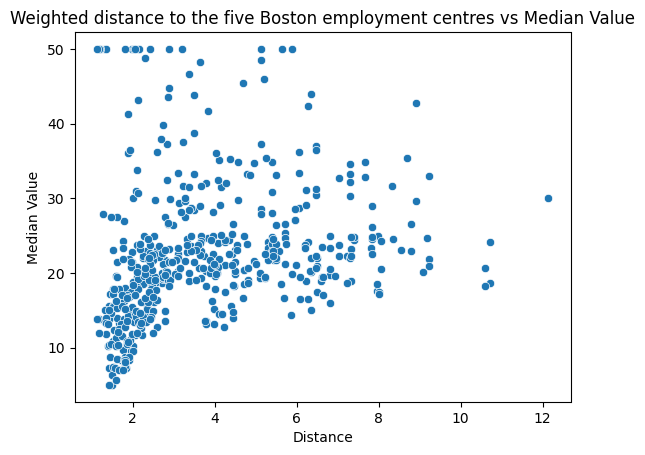

In [79]:
myplot=sns.scatterplot(x=boston_df.DIS,y=boston_df.MEDV)
myplot.set_title("Weighted distance to the five Boston employment centres vs Median Value")
myplot.set_xlabel("Distance")
myplot.set_ylabel("Median Value")

The scatterplot seems to indicate a correlation between median value and distance from the five employment centres. Lets run a correlation test to check:

In [89]:
#add in a correlation test to check
corr, p_value = scipy.stats.pearsonr(boston_df["DIS"], boston_df["MEDV"])
print("Pearson coefficient: {0} - p-value: {1}".format(corr,p_value))

Pearson coefficient: 0.2499287340859039 - p-value: 1.2066117273371074e-08


Now lets run some regression analysis to confirm our findings further:

* Weighted Distance (DIS) is the input variable, assigned to X
* Median Value (MEDV) is the dependent variable, assigned to y


In [74]:
X = boston_df['DIS']
y = boston_df['MEDV']

In [77]:
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 27 May 2024   Prob (F-statistic):           1.21e-08
Time:                        22:57:52   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**: Since the p-value (1.21e-08) is less than alpha value of 0.05, we reject the null hypothesis as there is enough evidence that weighted distance to the five Boston employment centres has an impact on median value